<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Quiz 2 Review

 _**Authors:** Noah C. (DSIR-1019), Kelly S. (DSIR-1019), Noelle B._

# Part 1: Conceptual Review

**Q:** What is modeling?

> **Answer:**  
Modeling is a simplification of reality. It allows us to make educated predictions based on patterns in the data.

### Calculate mean squared error.

**Q:** Describe Mean Squared Error in words.

> **Answer:**  
Mean squared error is the average of the squared residuals.

**Q:** Write a function that would calculate the mean squared error given real values and predictions. (use the provided lists to check your function works - the result should be 4.25)

In [1]:
real_values = [2,5,3,17,36,1,9,11]
pred_values = [4,6,4,14,32,2,8,12]

In [2]:
# Answer:
# code from global lesson 3.01
def mse(real, preds):
    n = len(real)
    result = 0
    for i in range(n):
        result += (real[i] - preds[i])**2
    result = result/n
    return result

In [3]:
mse(real_values,pred_values)

4.25

### State the assumptions of a linear regression model.

**Q:** State the assumptions of simple linear regression and multiple linear regression

> **Answer:**  
- Linearity: $Y$ must have an approximately linear relationship with each $X$ variable.
- Independence of Errors: Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
- Normality: The errors (residuals) follow a Normal distribution with mean 0.
- Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X$ variables. (There should be no discernable relationship between the $X$ variable and the residuals.)
- Independence of Predictors (almost always violated at least a little!): The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

### Be able to interpret the coefficients of a linear regression model.

**Q:** You perform a linear regression to predict sales in thousands of dollars, and you get the following coefficients. Interpret both of them:

| Feature | Coefficient |
| --- | --- |
| Facebook Ads | 3019 |
| Podcast Ads | 2187 |

> **Answer:**  
- Facebook Ads: For every one unit increase in Facebook ad spending, we expect Sales to increase by \$3,019 holding all else constant.  
- Podcast Ads: For every one unit increase in Podcast ad spending, we expect Sales to increase by \$2,187 holding all else constant.

### Identify the difference between simple and multiple linear regression.

**Q:** Describe the difference between a simple linear regression model and a multiple linear regression model.

> **Answer:**  
SLR predicts the target using only one feature. MLR predicts the target with more than one feature.

----------------------------------------------------------

## Define six regression metrics.

**Q:** Define the following regression metrics:
- Residuals
- Mean Absolute Error (MAE)
- Sum Squared Error (SSE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Coefficient of Determination (R2)

>**Answer:**  
- Residuals: The difference between the real value and your predicted value
- Mean Absolute Error (MAE): The average of the absolute value of the residuals
- Sum Squared Error (SSE): The sum of the residuals squared
- Mean Squared Error (MSE): The average of the squared residuals
- Root Mean Squared Error (RMSE): The square root of the MSE
- Coefficient of Determination (R2): The percentage of the variability in the target that can be explained by the x-variables in the model (relative to a model with no predictors).

### Describe feature selection.

**Q:** What is feature selection? What is at least one tactic we have learned to do feature selection?

> **Answer:**  
Feature selection is the process of choosing which features should be included in the model.  
Tactics:
- Look at a heatmap to determine features most highly correlated with the target variable
- Look at the OLS summary for statistically significant features

## Bias-Variance Tradeoff

### Describe error due to bias and error due to variance.

**Q:** What is bias in a model? How can you tell if your model has high bias?

> **Answer:**  
Bias is a measure of how simple or underfit the model is. In other words, bias is how bad your model is at predicting y. High bias means the model is bad and should be improved by adding variance.

**Q:** What is variance in a model? How can you tell if your model has high variance?

>**Answer:**  
Variance is a measure of how overfit or complicated your model is. In other words, variance is how bad your model is at generalizing to new data. High variance means a model does not perform well on new data and should be simplified.

### Define overfitting and underfitting.

**Q:** What does it mean to say a model is 'overfit'?

>**Answer:**   
An overfit model does well on the data it was trained on, but does not do well on new/unseen data.

**Q:** What does it mean to say a model is 'underfit'?

> **Answer:**  
An underfit model is essentially a bad model - it does not do well on any data. It should be improved by adding complexity.

### Identify the relationships among bias and variance.

**Q:** What is the common relationship between bias and variance?

> **Answer:**  
Typically, bias and variance have an inverse relationship. If a model has high variance, it has low bias and vice-versa.

### Describe and implement methods for reducing bias and variance.

**Q:** Your model has high bias. What could you do to try to fix this?

>**Answer:**  
Add complexity - add more features, engineer new features, or use a different model. Get more data.

**Q:** Your model has high variance. What could you do to try to fix this?

> **Answer:**  
Add bias - use fewer features, regularize.

---
## Train-Test-Split and Cross Validation

### Describe train/test split and cross-validation & explain how these validation techniques differ and why we want to use them.

**Q:** What is train/test split and why do we do it?

>**Answer:**  
Train/test split splits the data into a training set (about 80% of data) and a testing set (about 20% of data). This allows you to see how well your model performs on unseen data.

**Q:** What is cross validation and why do we do it?

> **Answer:**  
Cross validation allows you to see how well your model performs on unseen data several times. This prevents a good or bad score due to randomness from occurring and gives you more evidence on whether your model is good.

---

# Part 2: Pandas & Sklearn

The provided data is from the book "Machine Learning with R" and consists of anonymized information about individuals and their insurance costs. Data can be found here: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

Import any libraries you need (of the ones we've covered in class), and read in the **`insurance.csv`**
dataset from the **`data`** folder in this repository.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('data/insurance.csv')
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0.0,yes,southwest,16884.92400
1,1,18,male,33.770,1.0,no,southeast,1725.55230
2,2,28,male,33.000,NaN,no,southeast,4449.46200
3,3,33,male,22.705,0.0,no,northwest,21984.47061
4,4,32,male,28.880,0.0,no,northwest,3866.85520


### Data Cleaning

Explore this dataset a little. Check the column types, display some summary statistics, inspect any missing values. Any missing values in the `children` column should be replaced with 3.

In [6]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children      float64
smoker         object
region         object
charges       float64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1181.000000,1338.000000
mean,668.500000,39.207025,30.663397,0.841660,13270.422265
std,386.391641,14.049960,6.098187,1.048563,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,1.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

Unnamed: 0      0
age             0
sex             0
bmi             0
children      157
smoker          0
region          0
charges         0
dtype: int64

In [9]:
# Shows both data types & non-null value counts together
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1181 non-null   float64
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [10]:
df['children'].fillna(3, inplace = True)

**Q:** Drop the `Unnamed: 0` column

In [11]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

**Q:** What are the average values for the numeric columns (`age`, `bmi`, `children`, `charges`)?

In [12]:
for col in df._get_numeric_data():
    print(f"{col}: {df[col].mean()}")

age: 39.20702541106129
bmi: 30.66339686098655
children: 1.0949177877429
charges: 13270.422265141257


## EDA

**Q:** Explore the data visually (make a minimum of 3 plots - including _at least_ 1 histogram and 1 scatterplot)

**Some ideas for things to explore:**
- distribution of data in `charges` column
- scatterplot comparing `age` to `charges`
- bar chart of `children`

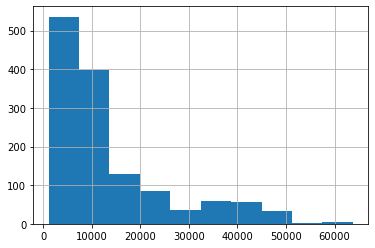

In [13]:
df['charges'].hist();

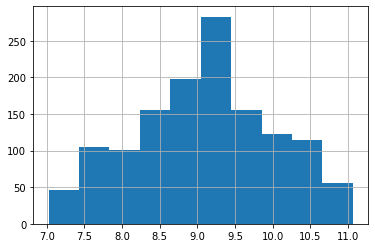

In [14]:
np.log(df['charges']).hist();

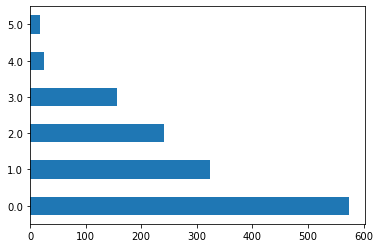

In [15]:
df['children'].value_counts().plot(kind = 'barh');

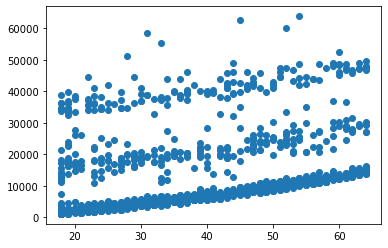

In [16]:
plt.scatter(df['age'], df['charges']);

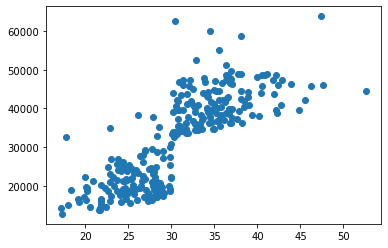

In [17]:
smoke_df = df[df['smoker'] == 'yes']
plt.scatter(smoke_df['bmi'], smoke_df['charges']);

### Feature Engineering

**Q:** Make dummy columns for any categorical features in the dataset (remember to set `drop_first = True`)

In [18]:
df = pd.get_dummies(df, columns=['smoker', 'region','sex'], drop_first=True)

**Q:** Create a new feature that captures the interaction between the number of children (`children`) and age (`age`).

In [19]:
df['age_x_children'] = df['age']*df['children']

**BONUS:** Use `PolynomialFeatures` from `sklearn.preprocessing` to make interaction terms for the `age`, `bmi`, and `children` columns.

In [20]:
# from sklearn.preprocessing import PolynomialFeatures

# features = ['age','bmi','children']

# poly = PolynomialFeatures(include_bias=False)
# X_poly = poly.fit_transform(df[features])
# poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(features))

### Modeling

Setup your `X` and `y` for modeling. Include any features you want in `X` (with the exception of the target column), `y` should be just the `charges` column in the dataset.

Split your data into training and testing sets using a random state of 28 and set train size to be 0.6.

In [21]:
X = df.drop(columns=['charges'])
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 28, train_size = 0.6)

Instantiate and fit a linear regression model on your data. Score the model on both training and testing data - evaluating it using both R-squared and RMSE.

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [23]:
print(f"Training R2: {lr.score(X_train, y_train)}")
print(f"Testing R2: {lr.score(X_test, y_test)}")
print(f"Cross val R2: {cross_val_score(lr, X, y).mean()}")

Training R2: 0.765425094949772
Testing R2: 0.7253726605055514
Cross val R2: 0.7465682033305984


In [24]:
print(f"Training RMSE: {mean_squared_error(y_train, lr.predict(X_train))**0.5}")
print(f"Testing RMSE: {mean_squared_error(y_test, lr.predict(X_test))**0.5}")
print(f"Cross val RMSE: {cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error').mean()*-1}")

Training RMSE: 5853.849363769427
Testing RMSE: 6356.479909224122
Cross val RMSE: 6075.572802451539


**Q:** Interpret the testing R-squared score

72.5% of the variability in charges can be explained by the X's (features/predictors) in our model (relative to a model with no predictors)

### Feature Importances

**Q:** Examine the intercept and coefficients in your model. Interpret what the intercept means in this context. Interpret (at least) one of coefficients.

In [25]:
lr.intercept_

-11501.964247548962

The baseline charge for an individual with 0 in every column (i.e. age, bmi, and children are all 0) is $-11,501. (ah what I would give to be 0 years old again!)

In [26]:
lr.coef_

array([ 2.68270172e+02,  3.13164078e+02,  7.05258626e+02,  2.44932901e+04,
       -1.49379450e+02, -1.28805868e+03, -5.64054997e+02, -5.70788799e+02,
       -6.00931817e+00])

In [27]:
coef_df = pd.DataFrame({
    'column' : X.columns,
    'coef'   : lr.coef_
})

In [28]:
coef_df

,column,coef
0,age,268.270172
1,bmi,313.164078
2,children,705.258626
3,smoker_yes,24493.290138
4,region_northwest,-149.379450
5,region_southeast,-1288.058681
6,region_southwest,-564.054997
7,sex_male,-570.788799
8,age_x_children,-6.009318


Everything else being held equal, if a person is a smoker, their insurance charge will increase by about $24,493.29.

**Q:** Make two scatter plots of your predicted charges against the actual charges for the training and testing datasets.

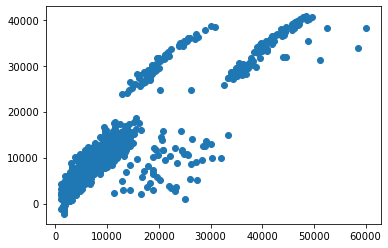

In [29]:
plt.scatter(y_train, lr.predict(X_train))

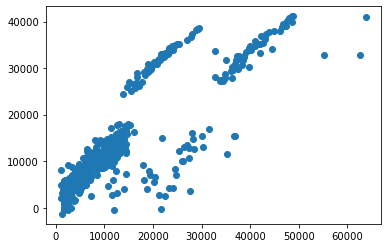

In [30]:
plt.scatter(y_test, lr.predict(X_test))